In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

In [2]:
titanic = pd.read_csv('https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/4aa/602/085/TITANIC.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*  the max price/fare a passenger paid for a ticket in this data set was 512.3292 British pounds, and the minimum price/fare was 0 British pounds.

* there is some missing data for the age column as it’s less than 891 (the number of passengers in this data set).

* The mean age is 29.699 and the oldest passenger in this data set was 80 years old, while the youngest was only .42 years old (about 5 months).


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Get count of the number of survivors
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* In this data set, there were more passengers that didn’t survive (549) than did (343).

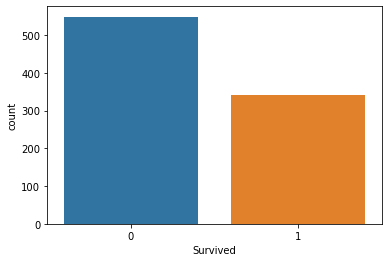

In [7]:
#Visualizing the count of number of survivors 
sns.countplot(titanic['Survived'],label="COUNT")

In [8]:
#Look at survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
#Look at survival rate by sex and class
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


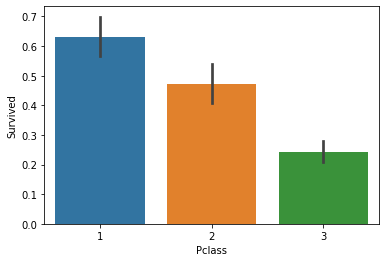

In [10]:
#Plot the survival rate of each class.
sns.barplot(x='Pclass', y='Survived', data=titanic)

In [11]:
#Count the empty (NaN, NAN, na) values in each column
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looks like columns age, embarked, deck, and embarked_town are missing some values.

In [12]:
#Look at all of the values in each column & get a count 
for val in titanic:
   print(titanic[val].value_counts())
   print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Carlsson, Mr. Frans Olof             1
Pears, Mr. Thomas Clinton            1
Thayer, Mr. John Borland             1
Lundahl, Mr. Johan Svensson          1
Birkeland, Mr. Hans Martin Monsen    1
                                    ..
Johansson, Mr. Karl Johan            1
Leinonen, Mr. Antti Gustaf           1
Nenkoff, Mr. Christo                 1
Davis, Miss. Mary                    1
Elsbury, Mr. William James           1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5

 drop the redundant columns that are non-numerical and remove rows with missing values.

In [13]:
titanic = titanic.drop(['Cabin'],axis=1)
titanic = titanic.drop(['Name'],axis=1)
titanic = titanic.drop(['Ticket'],axis=1)
titanic = titanic.drop(['PassengerId'],axis=1)



#Remove the rows with missing values
titanic = titanic.dropna(subset =['Embarked', 'Age'])

In [14]:
titanic.shape

(712, 8)

In [15]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [17]:
#print the unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
#Converting non-numeric data to numeric data
#(Transforming object datatype to integers)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


#Encoding the sex column
titanic.iloc[:,2] = le.fit_transform(titanic.iloc[:,2].values)
#print(le.fit_transform(titanic.iloc[:,2].values))

#Encoding the Embarked Column
titanic.iloc[:,7]= le.fit_transform(titanic.iloc[:,7].values)
#print(le.fit_transform(titanic.iloc[:,7].values))

In [26]:
#Print the NEW unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


# Splitting dataset into X and Y variable

In [27]:
#X - Independent Variables
X = titanic.iloc[:,1:8].values

#Y - Dependent Variable (which we have to predict - (in this case)SURVIVED)
Y = titanic.iloc[:,0].values

## Splitting dataset into training and testing

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

## Scaling the data

In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Function that has within it many different machine learning models that we can use to make our predictions.

In [38]:

def models(X_train , Y_train):
    
    #LOGISITIC REGRESSION
    from sklearn.linear_model import LogisticRegression
    logi = LogisticRegression(random_state=0)
    logi.fit(X_train,Y_train)
    
    #K-NEAREST NEIGHORS CLASSIFIER
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train ,Y_train)
    
    #DECISION TREE CLASSIFIER
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train, Y_train)
    
    #RANDOM FOREST CLASSIFIER
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    #Printing Model Accuracy
    
    print('1. Logistic Regression Training Accuracy:', logi.score(X_train,Y_train)*100 ,' %')
    print('2. KNN Classifier Training Accuracy:', knn.score(X_train,Y_train)*100,' %')
    print('3. Decision Tree Classifier Training Accuracy:', tree.score(X_train,Y_train)*100,' %')
    print('4. Random Forest Training Accuracy:', forest.score(X_train,Y_train)*100,' %')
    
    return logi,knn,tree,forest

In [39]:
#Get and Train all of the models
model = models(X_train ,Y_train)

1. Logistic Regression Training Accuracy: 79.78910369068541  %
2. KNN Classifier Training Accuracy: 86.64323374340948  %
3. Decision Tree Classifier Training Accuracy: 99.29701230228471  %
4. Random Forest Training Accuracy: 97.53954305799648  %


# Performance Metrics and Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    #Extracting TN,FP,FN,TP
    TN,FP,FN,TP = confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111 !"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832 !"

[[60 22]
 [10 51]]
Model[2] Testing Accuracy = "0.7762237762237763 !"

[[67 15]
 [13 48]]
Model[3] Testing Accuracy = "0.8041958041958042 !"



We will choose the Random Forest Model to see which passengers on board the ship would survive and then another prediction to see of i wouuld've survived.

The Random Forest Model did second-best on the training and testing data and has accuracy of 80.41 % on the testing and 97.53 % on the training data.

In [41]:
#Getting important of the features

forest = model[3]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


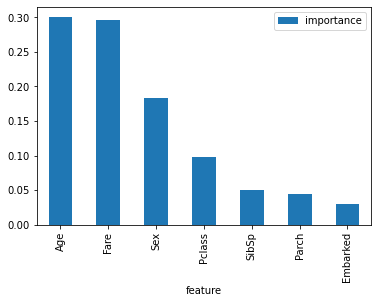

In [42]:
#Visualizing the important features
importances.plot.bar()

In [44]:
#Printing the predictions of Random Forest Classifier Model

Y_pred = model[3].predict(X_train)
print(Y_pred)

print()

#printing the actual values
print(Y_test)

[0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 

Now we have analyzed the data, created our models, and chosen a model to predict who would’ve survived the Titanic, let’s test and see if I would have survived.

In [65]:
#Predicting from Inputs taken from user

pclass = int(input("ENTER PASSENGER CLASS : 1-first class, 2- second class, 3- third class:  "))
sex = int(input("Enter SEX: 1-Male, 2-Female:  "))
age = int(input("Enter your AGE:  "))
sibsp = int(input("Enter 1 if you have Siblings or Spouses else Enter 0:  "))
parch = int(input("Enter 1 if you have any children or parent else 0:  "))
fare = int(input("Enter the Ticket fare:  "))
embarked = int(input("Enter the embarked Town: 0 - Queenstown(Q) , 1 - SouthHampton , 2 - Cherbourg :  "))


survival = [[pclass,sex,age,sibsp,parch,fare,embarked]]

#calculating survival prediction for given inputs from user
pred_survival = model[3].predict(survival)
print()

print(pred_survival)

if(pred_survival == 0):
    print("OH NO!! YOU DIDN'T MAKE IT")

else:
    print("HOLA!! YOU SURVIVED")

ENTER PASSENGER CLASS : 1-first class, 2- second class, 3- third class:  1
Enter SEX: 1-Male, 2-Female:  1
Enter your AGE:  70
Enter 1 if you have Siblings or Spouses else Enter 0:  0
Enter 1 if you have any children or parent else 0:  0
Enter the Ticket fare:  50
Enter the embarked Town: 0 - Queenstown(Q) , 1 - SouthHampton , 2 - Cherbourg :  1

[1]
HOLA!! YOU SURVIVED
